In [291]:
from sympy import *
from sympy.solvers.ode.systems import dsolve_system
x, y = symbols("x y", cls=Function)
t = symbols("t")

k = symbols('k')

T1 = 0.00025 #0.035 m / 140 rad from TSA test
# T1 = symbols("T1") #0.035 m / 140 rad from TSA test
T2 = 3 #guess for leg movement/string contract
m_a = 1/2 * 0.020 * 0.010**2 #cylinder MOI 20g 10mm radius
m_l = 0.1 #mass to push off ground
k = 1000 # no idea honestly

tau_s = 0.1 #N*m stall torque
omega_f = 3000 #about 10,000rpm free speed

eqs = [
    Eq(x(t).diff(t).diff(t), -(T1**2*k/m_a)*x(t) - (T1*k/(T2*m_a))*y(t) + (tau_s - tau_s*x.diff(t)/omega_f)/m_a), 
    Eq(y(t).diff(t).diff(t), (k*T1/(T2*m_l))*x(t) - (k/(T2**2*m_l))*y(t))
]
display(eqs[0], eqs[1])

sol = dsolve_system(eqs, ics={x(0):0, y(0):0, x(t).diff(t).subs(t,0):0, y(t).diff(t).subs(t,0):0})
# sol = dsolve_system(eqs)

xeq = simplify(sol[0][0])
yeq = simplify(sol[0][1])
display(xeq, yeq)

Eq(Derivative(x(t), (t, 2)), -62.5*x(t) - 83333.3333333333*y(t) + 99966.6666666667)

Eq(Derivative(y(t), (t, 2)), 0.833333333333333*x(t) - 1111.11111111111*y(t))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sympy/simplify/radsimp.py:1131: SymPyDeprecationWarning: 

Using non-Expr arguments in Mul is deprecated (in this case, one of
the arguments has type 'Tuple').

If you really did intend to use a multiplication or addition operation with
this object, use the * or + operator instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#non-expr-args-deprecated
for details.

This has been deprecated since SymPy version 1.7. It
will be removed in a future version of SymPy.

  return Mul(*numer, evaluate=not exact), Mul(*denom, evaluate=not exact)


Eq(x(t), 807.265053603006*sin(11.5558454962282*t)**2 - 7.53172026967277*sin(32.2501712550246*t)**2 + 807.265053603006*cos(11.5558454962282*t)**2 - 807.265053603009*cos(11.5558454962282*t) - 7.53172026967277*cos(32.2501712550246*t)**2 + 7.53172026967276*cos(32.2501712550246*t))

Eq(y(t), 0.688153725896098*sin(11.5558454962282*t)**2 - 0.088353725896098*sin(32.2501712550246*t)**2 + 0.688153725896098*cos(11.5558454962282*t)**2 - 0.6881537258961*cos(11.5558454962282*t) - 0.088353725896098*cos(32.2501712550246*t)**2 + 0.0883537258960978*cos(32.2501712550246*t))

In [298]:
from sympy import *
from sympy.solvers.ode.systems import dsolve_system
x, y = symbols("x y", cls=Function)
t = symbols("t")

k = symbols('k')

T1 = 0.00025 #0.035 m / 140 rad from TSA test
# T1 = symbols("T1") #0.035 m / 140 rad from TSA test
T2 = 3 #guess for leg movement/string contract
m_a = 1/2 * 0.01 * 0.010**2 #cylinder MOI 20g 10mm radius
m_l = 0.1 #mass to push off ground
k = 1000 # no idea honestly

tau_s = 0.1 #N*m stall torque
omega_f = 3000 #about 10,000rpm free speed

eqs = [
    Eq(x(t).diff(t).diff(t), -(T1**2*k/m_a)*x(t) - (T1*k/(T2*m_a))*y(t) + (tau_s - tau_s*x.diff(t)/omega_f)/m_a), 
    Eq(y(t).diff(t).diff(t), (k*T1/(T2*m_l))*x(t) - (k/(T2**2*m_l))*y(t))
]
display(eqs[0], eqs[1])

sol = dsolve_system(eqs, ics={x(0):0, y(0):0, x(t).diff(t).subs(t,0):0, y(t).diff(t).subs(t,0):0})
# sol = dsolve_system(eqs)

xeq = simplify(sol[0][0])
yeq = simplify(sol[0][1])
display(xeq, yeq)

Eq(Derivative(x(t), (t, 2)), -125.0*x(t) - 166666.666666667*y(t) + 199933.333333333)

Eq(Derivative(y(t), (t, 2)), 0.833333333333333*x(t) - 1111.11111111111*y(t))

Eq(x(t), 855.760469334588*sin(17.1823235241843*t)**2 - 56.0271360012556*sin(30.673748864809*t)**2 + 855.760469334588*cos(17.1823235241843*t)**2 - 855.760469334588*cos(17.1823235241843*t) - 56.0271360012556*cos(30.673748864809*t)**2 + 56.0271360012557*cos(30.673748864809*t))

Eq(y(t), 0.874068138265731*sin(17.1823235241843*t)**2 - 0.274268138265732*sin(30.673748864809*t)**2 + 0.874068138265731*cos(17.1823235241843*t)**2 - 0.874068138265731*cos(17.1823235241843*t) - 0.274268138265732*cos(30.673748864809*t)**2 + 0.274268138265732*cos(30.673748864809*t))

3.3947601508584606


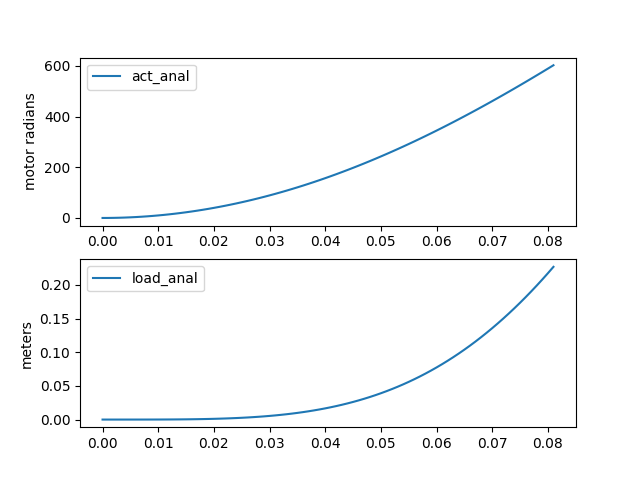

In [300]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

# k = 5000

def RK4(f, X, dt):
    # Runge-Kutta 4 integration
    k1,log = f(X)
    k2,_ = f(X + (dt/2)*k1)
    k3,_ = f(X + (dt/2)*k2)
    k4,_ = f(X + dt*k3)
    return X + (dt/6)*(k1 + 2*k2 + 2*k3 + k4), log

def f(X):
    x, xd, y, yd = X
    xdd = -(T1**2*k/m_a)*x - (T1*k/(T2*m_a))*y + (tau_s - tau_s*xd/omega_f)/m_a 
    ydd = (k*T1/(T2*m_l))*x - (k/(T2**2*m_l))*y
    return np.array([xd, xdd, yd, ydd]), T1*T2*x-y

log = [[], [],[], [],[], []] #t, x_anal,y_anal, x_rk4,y_rk4, spring

dt = 0.001
X = np.zeros(4)
for ti in np.arange(0, 0.5, step=dt):
    x_anal = xeq.rhs.subs(t,ti).n()
    y_anal = yeq.rhs.subs(t,ti).n()

    X,spring = RK4(f, X, dt)
    x_rk4, xd_rk4, y_rk4, yd_rk4 = X

    log[0].append(ti)
    log[1].append(x_anal)
    log[2].append(y_anal)
    log[3].append(x_rk4)
    log[4].append(y_rk4)
    log[5].append(spring)

    if(y_rk4 > 0.1):
        break

print(yd_rk4)

plt.close('all')
fig, axs = plt.subplots(2, 1)
axs[0].plot(log[0], log[1], label='act_anal')
# axs[0].plot(log[0], log[3], label='act_rk4')
axs[0].set_ylabel("motor radians")

axs[1].plot(log[0], log[2], label='load_anal')
# axs[1].plot(log[0], log[4], label='load_rk4')
# axs[1].plot(log[0], log[5], label='spring')
axs[1].set_ylabel("meters")


[ax.legend() for ax in axs]
plt.show()


500.0
1000.0
1500.0
2000.0
2500.0
3000.0
3500.0
4000.0
4500.0
5000.0


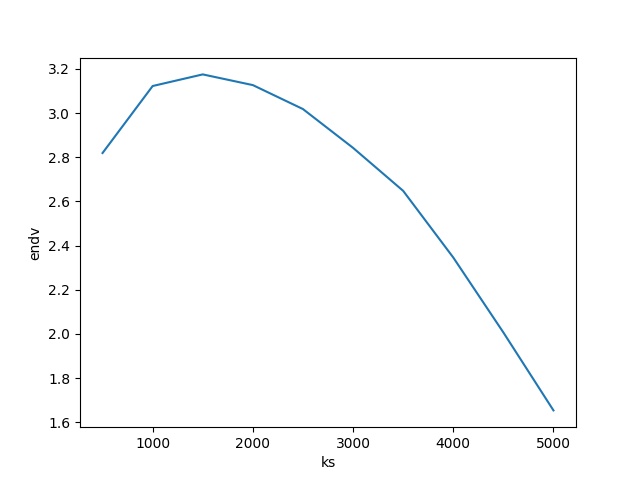

In [278]:
ks = np.linspace(500, 5000, 10)
endv = []
for k in ks:

    print(k)


    def f(X):
        x, xd, y, yd = X
        xdd = -(T1**2*k/m_a)*x - (T1*k/(T2*m_a))*y + (tau_s - tau_s*xd/omega_f)/m_a 
        ydd = (k*T1/(T2*m_l))*x - (k/(T2**2*m_l))*y
        return np.array([xd, xdd, yd, ydd]), T1*T2*x-y


    dt = 0.001
    X = np.zeros(4)
    for ti in np.arange(0, 0.5, step=dt):
        # x_anal = xeq.rhs.subs(t,ti).n()
        # y_anal = yeq.rhs.subs(t,ti).n()

        X,spring = RK4(f, X, dt)
        x_rk4, xd_rk4, y_rk4, yd_rk4 = X


        if(y_rk4 > 0.1):
            break
    
    endv.append(yd_rk4)


plt.figure()
plt.plot(ks, endv)
plt.xlabel('ks')
plt.ylabel('endv')
plt.show()


In [289]:
from sympy import *
from sympy.solvers.ode.systems import dsolve_system
x, y = symbols("x y", cls=Function)
t = symbols("t")

c0, c1, c2, c3, c4, c5, c6 = symbols('c:7')

tau_s = 0.1 #N*m stall torque
omega_f = 3000 #about 10,000rpm free speed

eqs = [
    Eq(x(t).diff(t).diff(t), c1*x.diff(t) + c2*x(t) + c3*y(t) + c4), 
    Eq(y(t).diff(t).diff(t), c5*x(t) + c6*y(t))
]
display(eqs[0], eqs[1])

sol = dsolve_system(eqs, ics={x(0):0, y(0):0, x(t).diff(t).subs(t,0):0, y(t).diff(t).subs(t,0):0})
# sol = dsolve_system(eqs)

xeq = simplify(sol[0][0])
yeq = simplify(sol[0][1])
display(xeq, yeq)

Eq(Derivative(x(t), (t, 2)), c1 + c2*x(t) + c3*y(t) + c4)

Eq(Derivative(y(t), (t, 2)), c5*x(t) + c6*y(t))

KeyboardInterrupt: 